## Chi-Square distribution

In [1]:
import numpy as np

In [2]:
# set freedom degree of Q array, which means sampling 8 samples from standard normal distribution
df = 8
Q = []

In [7]:
# generate 8 numbers which is standard normal distribution 
# (this is similar with sampling 8 numbers from a standard normal distiibution)
mean = 0
std = 1
for i in range(1000):
    z = np.random.normal(mean, std, df)
    q = sum(z**2)
    Q.append(q)

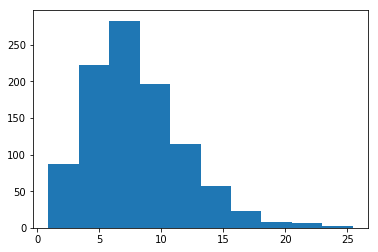

In [8]:
import matplotlib.pyplot as plt
plt.hist(Q)
plt.show() # Q is Chi-square distribution, it is not normal distribution

### Use python to 

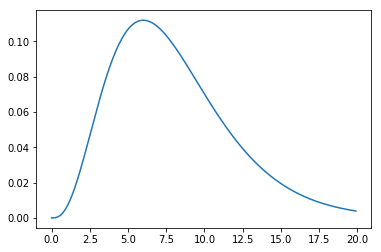

In [9]:
from scipy.stats import chi2
# draw the probability density distribution of Chi-square distribution
x = np.arange(0, 20, 0.1)
y = chi2.pdf(x, df)
plt.plot(x, y)
plt.show()

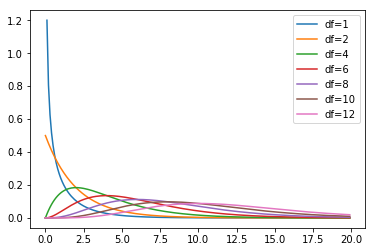

In [17]:
# draw Chi-square distribution figure with different df
df =1
plt.plot(x, chi2.pdf(x, df), label="df=%d"%df)
df =2
plt.plot(x, chi2.pdf(x, df), label="df=%d"%df)
df =4
plt.plot(x, chi2.pdf(x, df), label="df=%d"%df)
df =6
plt.plot(x, chi2.pdf(x, df), label="df=%d"%df)
df =8
plt.plot(x, chi2.pdf(x, df), label="df=%d"%df)
df =10
plt.plot(x, chi2.pdf(x, df), label="df=%d"%df)
df =12
plt.plot(x, chi2.pdf(x, df), label="df=%d"%df)

plt.legend()

## Project analysis:
### The frequency of letter "E", "T" , "N", "R", "O" in the english text is 29%, 21%, 17%, 17%, 16%. Now there is text, the times of letters in text are 100, 110, 80, 55, 14.
### Question: Does this text is an english text?
### H0: this text is an english text.

In [19]:
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt

In [20]:
x = np.array([29, 21, 17, 17, 16]) # total 100 letters

y = np.array([100, 110, 80, 55, 14]) # total 359 letters
# if y is from english text, what is its expected frequency?
pi = x/sum(x)
ei = pi * sum(y) # expected y value
print(ei)

[104.11  75.39  61.03  61.03  57.44]


In [21]:
# calculate Chi-square value
xChiSq = sum((y-ei)**2/ei)
print(xChiSq)

55.39549501483428


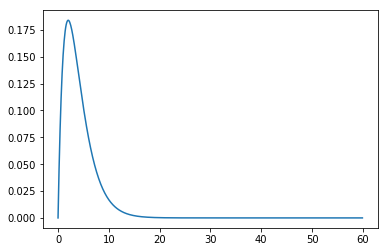

In [23]:
# check how Chi-square value is distributed with df 4
df = len(y)-1;

x = np.arange(0, 60, 0.1);
y = chi2.pdf(x, df)
plt.plot(x, y)

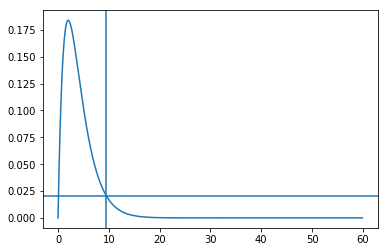

In [25]:
# the low p value is only in the right, so it is single tail, we only need calculate right edge
config = 0.95
right_tail = chi2.ppf(config, df)
plt.axvline(right_tail)
plt.axhline(chi2.pdf(right_tail, df))
plt.plot(x, y)
plt.show() # our xChiSq is 55, it is much bigger than 10, so we need refuse H0

In [26]:
# we can also check p value, it should be smaller than 0.05
# the low p value is only in the right, so it is sigle tail
p = 1 - chi2.cdf(xChiSq, df)
print(p) # because p value is smaller than 0.05, so we need to refuse H0

2.6845303757738748e-11


#### Answer: Because p value is smaller than 0.05, so we need to refuse H0, the text is not an english text

In [29]:
# Method 2: use python library calculate the Chi-square value and p value directly
from scipy.stats import chisquare
x = np.array([29, 21, 17, 17, 16])
y = np.array([100, 110, 80, 55, 14])
pi = x/sum(x)
ei = pi * sum(y) # expected y value
chisquare(y, ei)

Power_divergenceResult(statistic=55.39549501483428, pvalue=2.6845339866838983e-11)

## Chi-Square Test Of Independence
### Project: There is a survey, the survey question is whether the income is associated with gender. 120 males say 'yes', 60 males 'no', 50 males say 'unknown'; 100 females say 'yes', 110 females say 'no', 60 females say 'unknown'. 
### Question: Is income associated with gender"
### H0: Income is not associated with gender

In [31]:
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt

In [32]:
# male answer array
x = np.array([120, 60, 50])
# female answer array
y = np.array([100, 110, 60])

In [34]:
# if income is not associated with gender, the expected value for answers should be below:
pxy = (x+y)/sum(x+y)
ex = sum(x)*pxy # expected value of x
ey = sum(y)*pxy # expected value of y

In [37]:
# calculated Chi-square value of array
xChiSq = 0
for i in range(len(x)):
    xChiSq = xChiSq + (x[i]-ex[i])**2/ex[i]
    xChiSq = xChiSq + (y[i]-ey[i])**2/ey[i]
print(xChiSq)

14.32483401792864


In [38]:
# calculated freedom degree, there are two genders and three answers
df = (3-1)*(2-1)

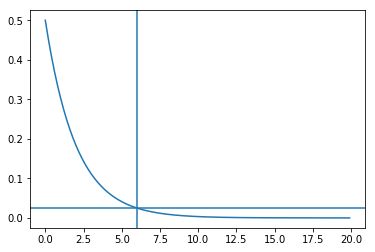

<Figure size 432x288 with 0 Axes>

In [42]:
# See how Chi-square is distributed with df, and see our xChiSq in which region
X = np.arange(0, 20, 0.1)
Y = chi2.pdf(X, df)
plt.plot(X, Y)
# set 95% confidencial level
config = 0.95
right_tail = chi2.ppf(config, df)
plt.axvline(right_tail)
plt.axhline(chi2.pdf(right_tail, df))
plt.show() # we can see our xChiSq (14.3) is outside of 95% confidencial reference
plt.savefig("png.png")

In [43]:
# calculate p value, p value should be smaller than 0.05
p = 1- chi2.cdf(xChiSq, df)
print(p)

0.0007751786733192212


### Answer: Because p value is smaller than 0.05, we should refuse H0, so income is associated with gender

In [45]:
# Method 2: use python library
from scipy.stats import chisquare
X = np.array([x, y]).T # we need to transform array, which is a required format
Y = np.array([ex, ey]).T
chisquare(X, Y, axis=None) # p value is different from our calculated

Power_divergenceResult(statistic=14.32483401792864, pvalue=0.013672508928330206)

#### statistic is 14.3, which is the same from our calculated, but p value from python library is different from our calculated p value, the reason is the df used in python is  '5' (3*2-1), but the df should be 2, there is a little problem of python library in choosing df

## Chi-Square Test for homogeneity

### Project: one agency wants to know whether people in Nanjing city and Beijing city has the same satisfication degree about minimum living guarantee. In Beijing, the number of people was showed, very satisfy: 110; satisfy: 160; unsatisfy: 170; very unsatisfy: 160. In Nanjing, very satisfy: 100; satisfy: 150; unsatisfy: 180; very unsatisfy: 170.
### Question: Is the satisfication degree the same in beijing and nanjing?
### H0: the satisfication degree is the same


In [48]:
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt

In [49]:
# satisfication of Nanjing people
x = numpy.array([100, 150, 180, 170])
# satisfication of Beijing people
y = numpy.array([110, 160, 170, 160])

In [50]:
'''
if the satisfication degree is the same, which means the proportion of 
people is the same, the expected number of people should be below:

''' 
pxy = (x+y)/sum(x+y)

ex = sum(x)*pxy # the expected value of x
ey = sum(y)*pxy # the expected value of y

In [51]:
xChiSq = 0;
for i in range(len(x)):
    xChiSq = xChiSq + (x[i]-ex[i])**2/ex[i]
    xChiSq = xChiSq + (y[i]-ey[i])**2/ey[i]
print(xChiSq)

1.387515710096355


In [52]:
# calculated freedom degree, there are two genders and three answers
df = (4-1)*(2-1)

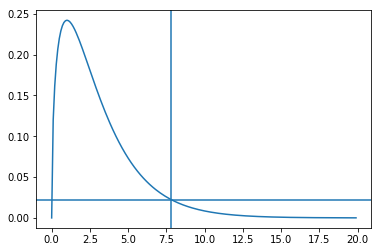

In [53]:
# See how Chi-square is distributed with df, and see our xChiSq in which region
X = np.arange(0, 20, 0.1)
Y = chi2.pdf(X, df)
plt.plot(X, Y)
# set 95% confidencial level
config = 0.95
right_tail = chi2.ppf(config, df)
plt.axvline(right_tail)
plt.axhline(chi2.pdf(right_tail, df))
plt.show() # we can see our xChiSq (14.3) is outside of 95% confidencial reference

In [54]:
# calculate p value, p value should be smaller than 0.05
p = 1- chi2.cdf(xChiSq, df)
print(p)

0.7084637100324422


### Answer: Because p value is bigger than 0.05, we cannot refuse H0, so the satisfication degree is the same

In [55]:
# Method 2: use python library
from scipy.stats import chisquare
X = np.array([x, y]).T # we need to transform array, which is a required format
Y = np.array([ex, ey]).T
chisquare(X, Y, axis=None) # p value is different from our calculated

Power_divergenceResult(statistic=1.387515710096355, pvalue=0.9859505806478553)

#### Answer: statistic is 1.39, which is the same from our calculated, but p value from python library is different from our calculated p value, the reason is the df used in python is  '7' (4*2-1), but the df should be 4, there is a little problem of python library in choosing df